# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [12]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

# Carregando o arquivo diretamente em um df e desta vez, retirando a coluna desnecessária
base_original = pd.read_csv("Base_m10.csv")
base_original.drop('Unnamed: 0', axis=1, inplace=True)
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

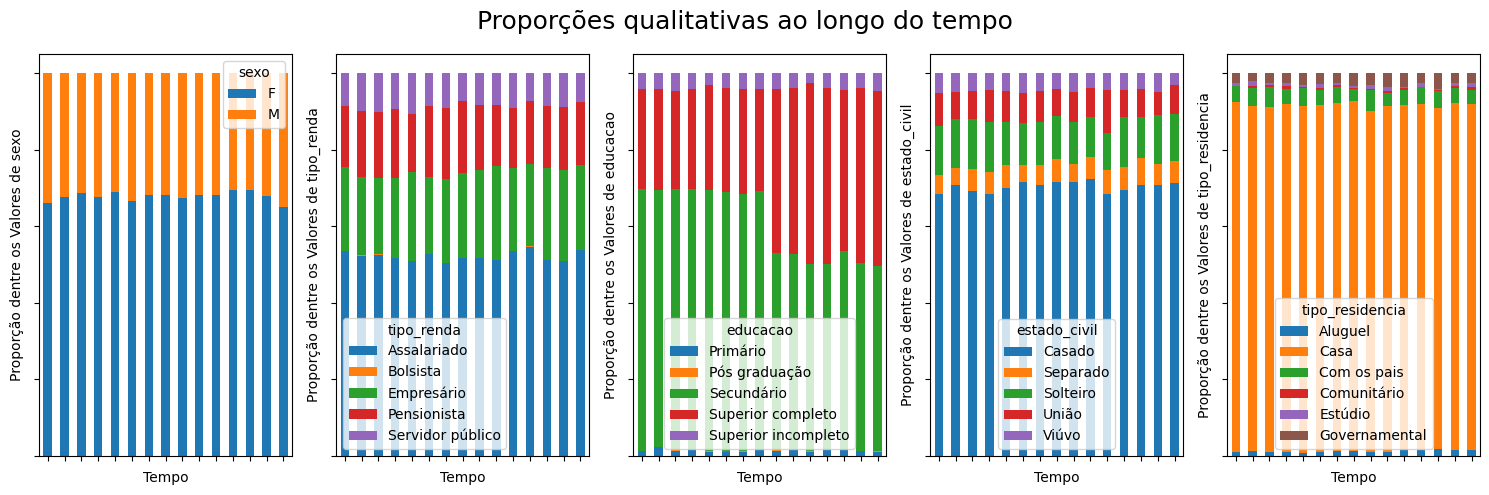

In [37]:
# Como qualitativas significa o oposto de quantitativas, alocarei as características "object" na variável independente
qualitativas = ["sexo", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"]
tempo = "data_ref"

fig, axs = plt.subplots(1, len(qualitativas), figsize=(15, 5))
fig.suptitle("Proporções qualitativas ao longo do tempo", fontsize=18)

# Iterando sobre as variáveis qualitativas e criando um gráfico ajustado para cada uma delas, lado a lado
for i, variavel in enumerate(qualitativas):
    dados_agrupados = base_original.groupby([tempo, variavel]).size().unstack()
    ax = axs[i]
    dados_agrupados.plot(kind="bar", stacked=True, ax=ax)
    ax.set_xlabel("Tempo")
    ax.set_ylabel(f"Proporção dentre os Valores de {variavel}")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

Sim! As proporções de quase todas variáveis se mantém oscilando minimamente ao longo do tempo. No entanto, distoa a bruta queda da variável educação, próxima a metade do intervalo de tempo da base de estudo. A proporção se altera na escolaridade seguindo de um ano para o outro; indicando a necessidade de uma investigação na cartela de dados da base.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

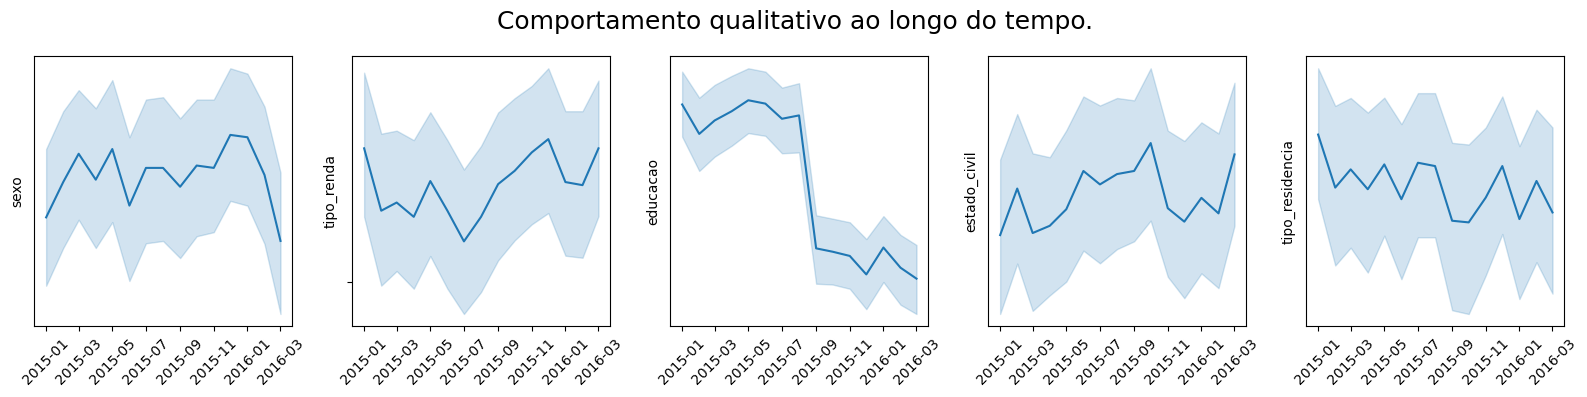

In [39]:
# Converter coluna "data_ref" para o tipo datetime
base_original['data_ref'] = pd.to_datetime(base_original['data_ref'])

# Configurar o layout dos gráficos
fig, axs = plt.subplots(nrows=1, ncols=len(qualitativas), figsize=(16, 4))
fig.suptitle("Comportamento qualitativo ao longo do tempo.", fontsize=18)

# Iterar sobre as variáveis e gerar os gráficos
for i, variavel in enumerate(qualitativas):
    ax = axs[i]
    # As condicionais a seguir foram necessárias porque o valor "empresário" estava sendo exibido.
    if variavel == "tipo_renda":
        sns.lineplot(x="data_ref", y=variavel, data=base_original, ci=95.45, ax=ax)
        ax.set_yticklabels([])
    else:
        sns.lineplot(x="data_ref", y=variavel, data=base_original, ci=95.45, ax=ax)
    ax.set_ylabel(variavel)
    ax.set_title("")

    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Houve uma queda no nível de educação, entre os meses Julho e Setembro de 2015.
Com certeza! A estabilidade dos dados é de suma importância em uma análise comportamental/preditiva.
80% das variáveis qualitativas apresentaram certa estabilidade no comportamento médio ao longo do tempo.
Pessoalmente, não descartaria a educação da minha análise. Pelo contrário, alteraria minha abordagem perante a ela, não mais como preditiva em relação a outra, mas sim, como variável-alvo de estudos.
De fato, ela não apresenta estabilidade para prever a renda, mas pode gerar um estudo secundário sobre a base de dados, provomendo insights esclarecedores posteriormente. Gosto de analisar pontualmente, tanto quanto globalmente, meus projetos. Tal comportamento da educação oferece uma ampliação no estudo, ao invés do descarte. A estabilidade prove tal ferramenta.